In [29]:
import pathlib
import os

# Create file structure

In [50]:
p = pathlib.Path('.')

In [49]:
for c in ['vegan', 'not_vegan']:
        os.makedirs(p/'data'/c, exist_ok=True)

In [52]:
ls = lambda x : list(x.iterdir())

ls(p/'data')

[PosixPath('data/not_vegan'), PosixPath('data/vegan')]

# Scrape Instragram

In [44]:
!pip install instagram-scraper

In [ ]:
# !instagram_scaper -h

In [84]:
vegan_food_accounts     = "buddha_bowls,vegan_bowls,vegansrecipe,thevegansclub,thevegansclublifestyle,thefeedfeed.vegan".split(',')

not_vegan_food_accounts = "burgersofthedays,sushiporn,foodgawker,ks_ate_here,thefeedfeed,huttoneats".split(',')

In [56]:
ds_length = 200
max_scrap = int(ds_length / len(vegan_food_accounts))
vegan_dir = p.absolute()/'data'/'vegan'

print(f'Scraping {max_scrap} for each of the {len(vegan_food_accounts)} accounts.')
for username in vegan_food_accounts:
    !instagram-scraper @insta_args.txt {username} -t image -m {max_scrap} -d {vegan_dir}


Scraping 33 for each of the 6 accounts.
Searching buddha_bowls for profile pic: 100% 1/1 [00:00<00:00, 1158.33 images/s]
Searching buddha_bowls for posts: 1 media [00:00,  1.09 media/s]
Downloading: 100%|##########| 33/33 [00:04<00:00,  7.66it/s]
Searching vegan_bowls for posts: 0 media [00:00, ? media/s]
Searching vegansrecipe for profile pic: 100% 1/1 [00:00<00:00, 1343.90 images/s]
Searching vegansrecipe for posts: 1 media [00:06,  6.80s/ media]
Downloading: 100%|##########| 23/23 [00:05<00:00,  2.82it/s]
Searching thevegansclub for profile pic: 100% 1/1 [00:00<00:00, 1412.70 images/s]
Searching thevegansclub for posts: 1 media [00:01,  1.49s/ media]
Downloading: 100%|##########| 33/33 [00:04<00:00,  6.53it/s]
Searching thevegansclublifestyle for profile pic: 100% 1/1 [00:00<00:00, 1726.05 images/s]
Searching thevegansclublifestyle for posts: 1 media [00:01,  1.28s/ media]
Downloading: 100%|##########| 33/33 [00:04<00:00,  7.33it/s]
Searching thefeedfeed.vegan for profile pic: 100% 

In [85]:
ds_length = 200
max_scrap = int(ds_length / len(not_vegan_food_accounts))
not_vegan_dir = p.absolute()/'data'/'not_vegan'

print(f'Scraping {max_scrap} for each of the {len(not_vegan_food_accounts)} accounts.')
for username in not_vegan_food_accounts:
    !instagram-scraper @insta_args.txt {username} -t image -m {max_scrap} -d {not_vegan_dir}

Scraping 33 for each of the 6 accounts.
Searching burgersofthedays for profile pic: 100% 1/1 [00:00<00:00, 1307.86 images/s]
Searching burgersofthedays for posts: 1 media [00:00,  1.43 media/s]
Downloading: 100%|##########| 34/34 [00:04<00:00,  7.42it/s]
Searching sushiporn for profile pic: 100% 1/1 [00:00<00:00, 1461.94 images/s]
Searching sushiporn for posts: 1 media [00:00,  1.41 media/s]
Downloading: 100%|##########| 34/34 [00:04<00:00,  7.74it/s]
Searching foodgawker for profile pic: 100% 1/1 [00:00<00:00, 512.25 images/s]
Searching foodgawker for posts: 1 media [00:00,  1.11 media/s]
Downloading: 100%|##########| 34/34 [00:04<00:00,  8.40it/s]
Searching ks_ate_here for profile pic: 100% 1/1 [00:00<00:00, 1061.31 images/s]
Searching ks_ate_here for posts: 1 media [00:16, 16.38s/ media]
Downloading: 100%|##########| 34/34 [00:15<00:00,  1.49it/s]
Exception ignored in: <function tqdm.__del__ at 0x7f009afc9510>
Traceback (most recent call last):
  File "/home/sandrine_verdugier/anaco

In [86]:
is_a_video = lambda path : '.mp4' in str(path)
for each_dir in [vegan_dir, not_vegan_dir]:
    for each_file in each_dir.iterdir():
        if is_a_video(each_file):
            each_file.unlink()

# Train a classifier

In [59]:
from fastai.vision import *

In [60]:
from fastai import *

In [62]:
dir()

['AdamW',
 'AdaptiveConcatPool2d',
 'AffineFunc',
 'AffineMatrix',
 'AnnealFunc',
 'Any',
 'AnyStr',
 'ArgStar',
 'AverageMetric',
 'BCEFlat',
 'BCEWithLogitsFlat',
 'BatchNorm1dFlat',
 'BatchSampler',
 'BatchSamples',
 'BnFreeze',
 'BoolOrTensor',
 'ByteTensor',
 'Callable',
 'Callback',
 'CallbackHandler',
 'CallbackList',
 'Category',
 'CategoryList',
 'CategoryProcessor',
 'ClassificationInterpretation',
 'Collection',
 'Config',
 'ConfusionMatrix',
 'CoordFunc',
 'Counter',
 'CrossEntropyFlat',
 'DataBunch',
 'DataFrame',
 'DataFrameOrChunks',
 'DataLoader',
 'Dataset',
 'DatasetType',
 'Debugger',
 'DeviceDataLoader',
 'Dict',
 'DoubleTensor',
 'EmptyLabel',
 'EmptyLabelList',
 'Enum',
 'ExpRMSPE',
 'ExplainedVariance',
 'F',
 'FBeta',
 'FilePathList',
 'Flatten',
 'FlattenedLoss',
 'FloatItem',
 'FloatList',
 'FloatOrTensor',
 'FloatTensor',
 'Floats',
 'FlowField',
 'GradientClipping',
 'HalfTensor',
 'Hashable',
 'HookFunc',
 'Image',
 'ImageBBox',
 'ImageDataBunch',
 'ImageIm

In [63]:
verify_images(path=vegan_dir)

In [87]:
verify_images(path=not_vegan_dir)

In [90]:
data = ImageDataBunch.from_folder(p, train='data', valid_pct=0.2, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

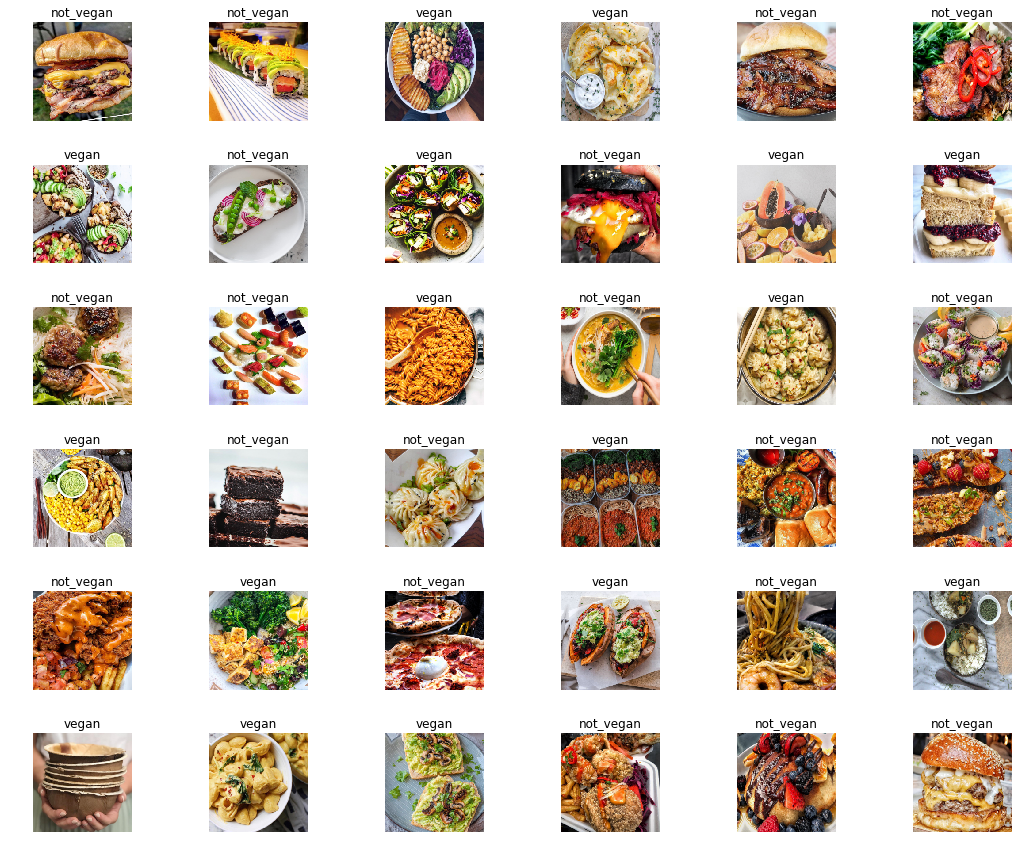

In [91]:
data.show_batch(rows=6, figsize=(15,12))

In [92]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


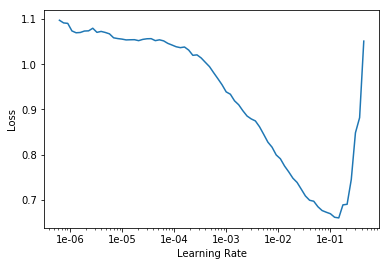

In [93]:
learn.lr_find()
learn.recorder.plot()

In [94]:
learn.fit_one_cycle(4, max_lr=slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,error_rate
1,1.076622,1.895896,0.346667
2,1.178406,8.216510,0.480000
3,1.160577,1.711478,0.173333
4,1.004076,1.329520,0.133333


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


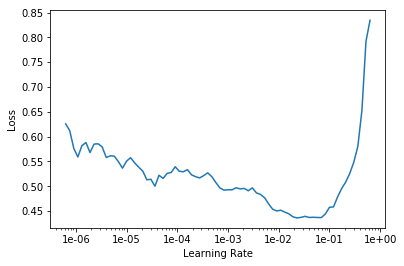

In [95]:
learn.lr_find()
learn.recorder.plot()

In [96]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,5e-2))

epoch,train_loss,valid_loss,error_rate
1,0.599533,1.033257,0.146667
2,0.577938,0.926325,0.226667
3,0.534312,0.844465,0.213333
4,0.467175,0.696277,0.186667
5,0.410714,0.613379,0.133333
6,0.381077,0.590046,0.146667
7,0.369518,0.577360,0.173333
8,0.348014,0.519194,0.146667


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


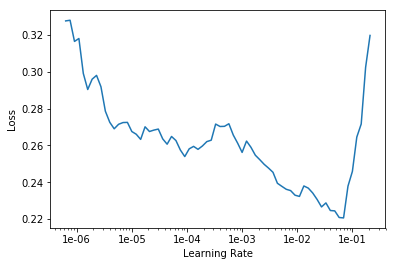

In [97]:
learn.lr_find()
learn.recorder.plot()